In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Loading Dataset

df = pd.read_csv('/kaggle/input/yulu-data/yulu_data.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Defining Problem Statement

**To find the variables with significance in predicting the demand for shared electric cycles in the Indian market.**


In [3]:
# Convert 'season', 'holiday', 'workingday', and 'weather' to categorical data type
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns:
    df[col] = df[col].astype('category')

df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month


In [4]:
# Display the structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float64(3), int32(2), int64(4)
memory usage: 808.7 KB


In [5]:
# Display the summary of the dataset

df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,month
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373


In [6]:
# Check for missing values
df.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
dtype: int64

### Univariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

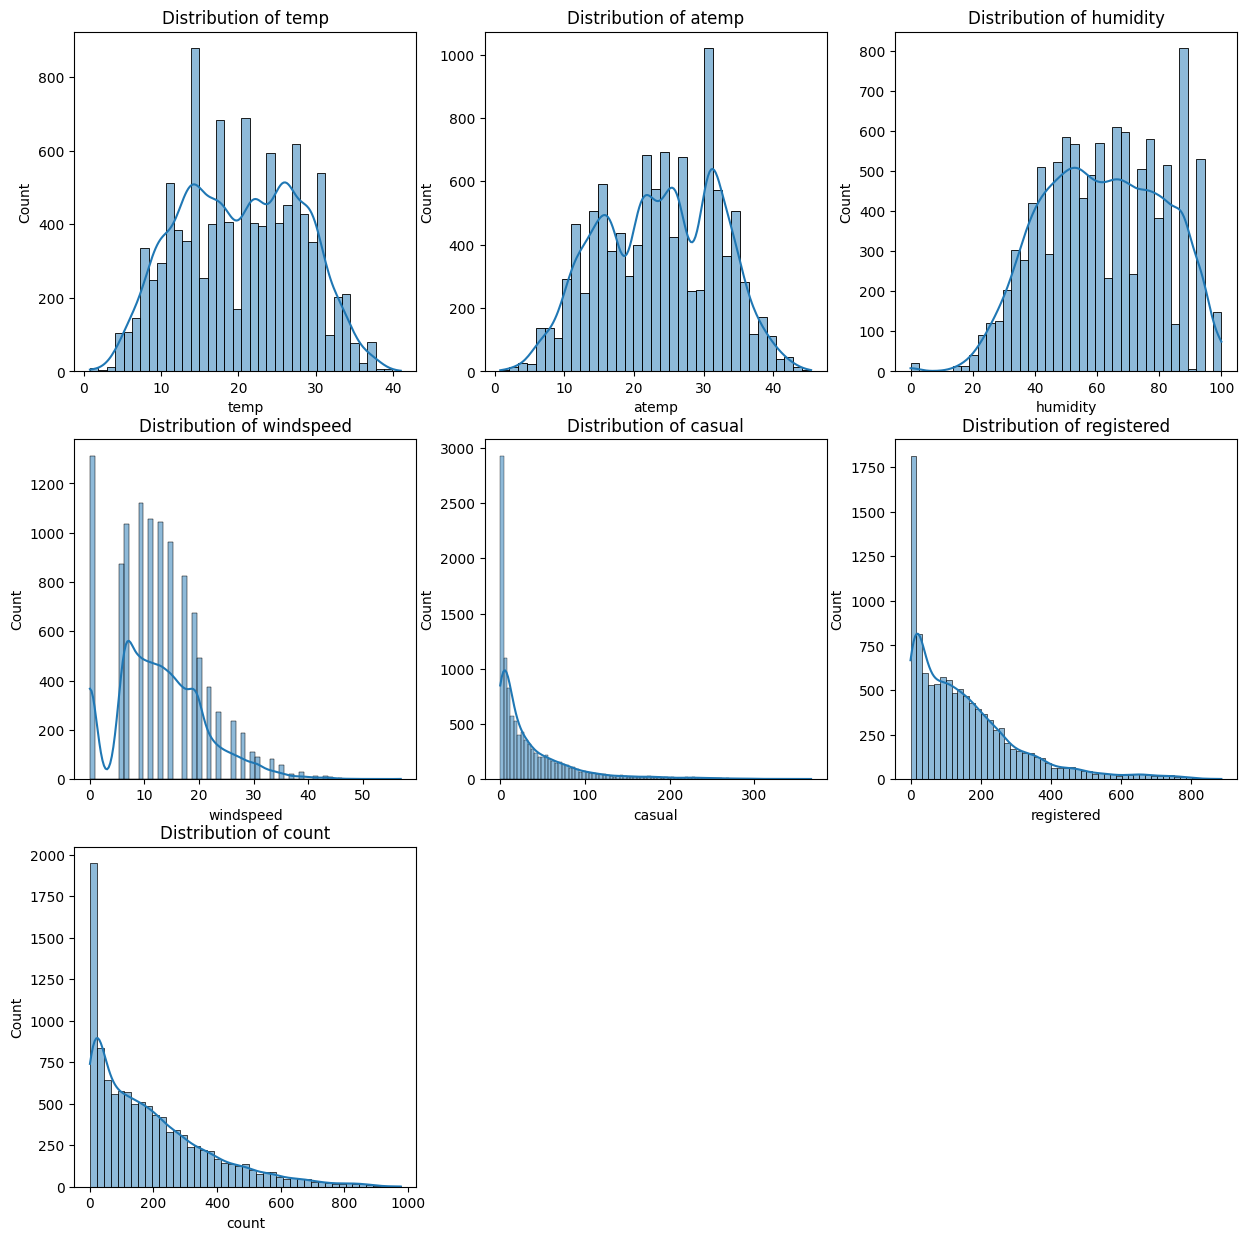

In [7]:
# Distribution plots for continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(15, 15))
i = 1
for var in continuous_vars:
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    i = i+1
plt.show()


## **Data in columns 'casual', 'windspeed and 'registered' are all right-skewed while 'temp', 'atemp' and 'humidity' are more close to normal distribution.**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


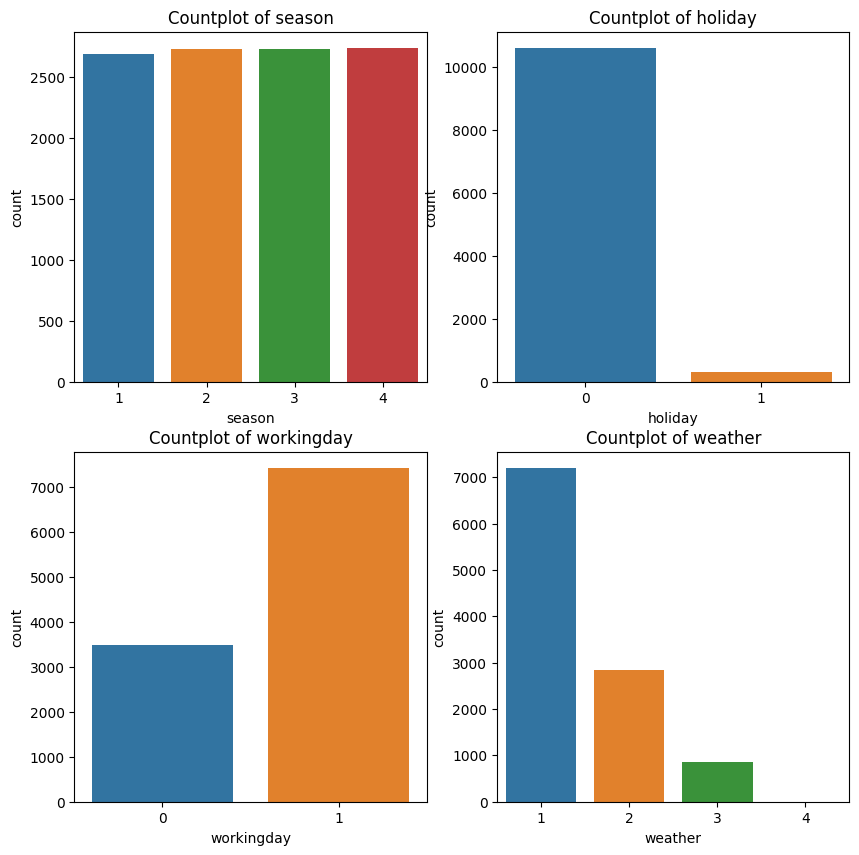

In [8]:

# Countplots for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']
i = 1
plt.figure(figsize=(10, 10))
for var in categorical_vars:
    plt.subplot(2, 2, i)
    sns.countplot(x=df[var])
    plt.title(f'Countplot of {var}')
    i += 1
plt.show()


## **While seasons has equal distributions among its groups, categories 'workingday', 'holiday', 'weather' has clear disparity among their groups.**

## Bivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

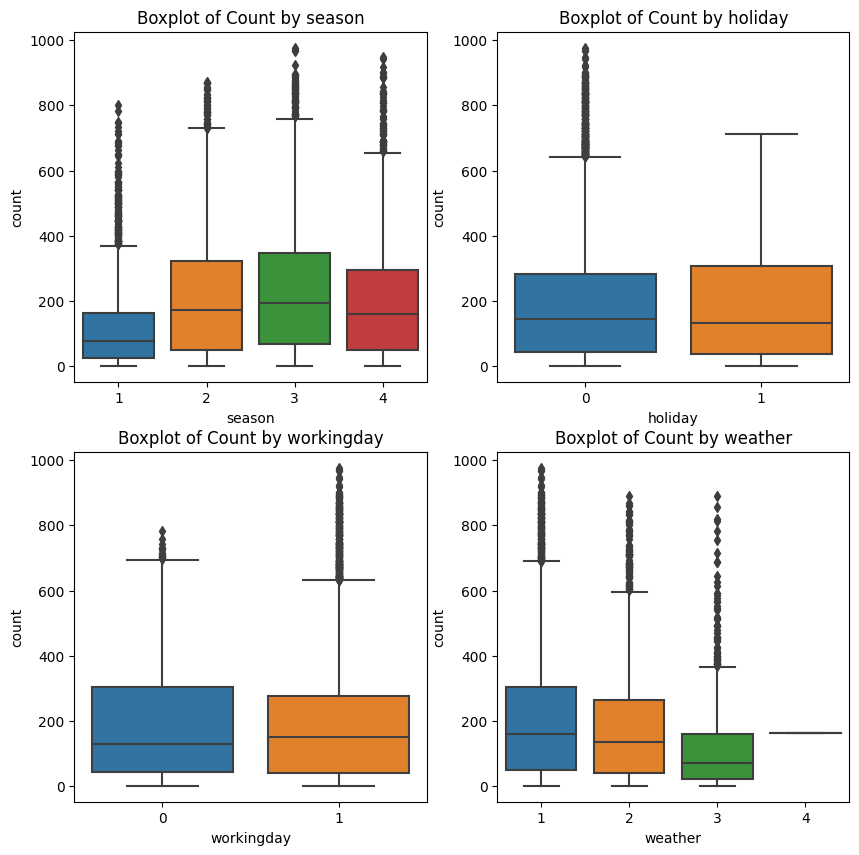

In [9]:
# Relationship between categorical variables and count
i = 1
plt.figure(figsize=(10, 10))
for var in categorical_vars:
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='count', data=df)
    i += 1
    plt.title(f'Boxplot of Count by {var}')
plt.show()


## **Majority of the category data has outliers in with 'count' values**

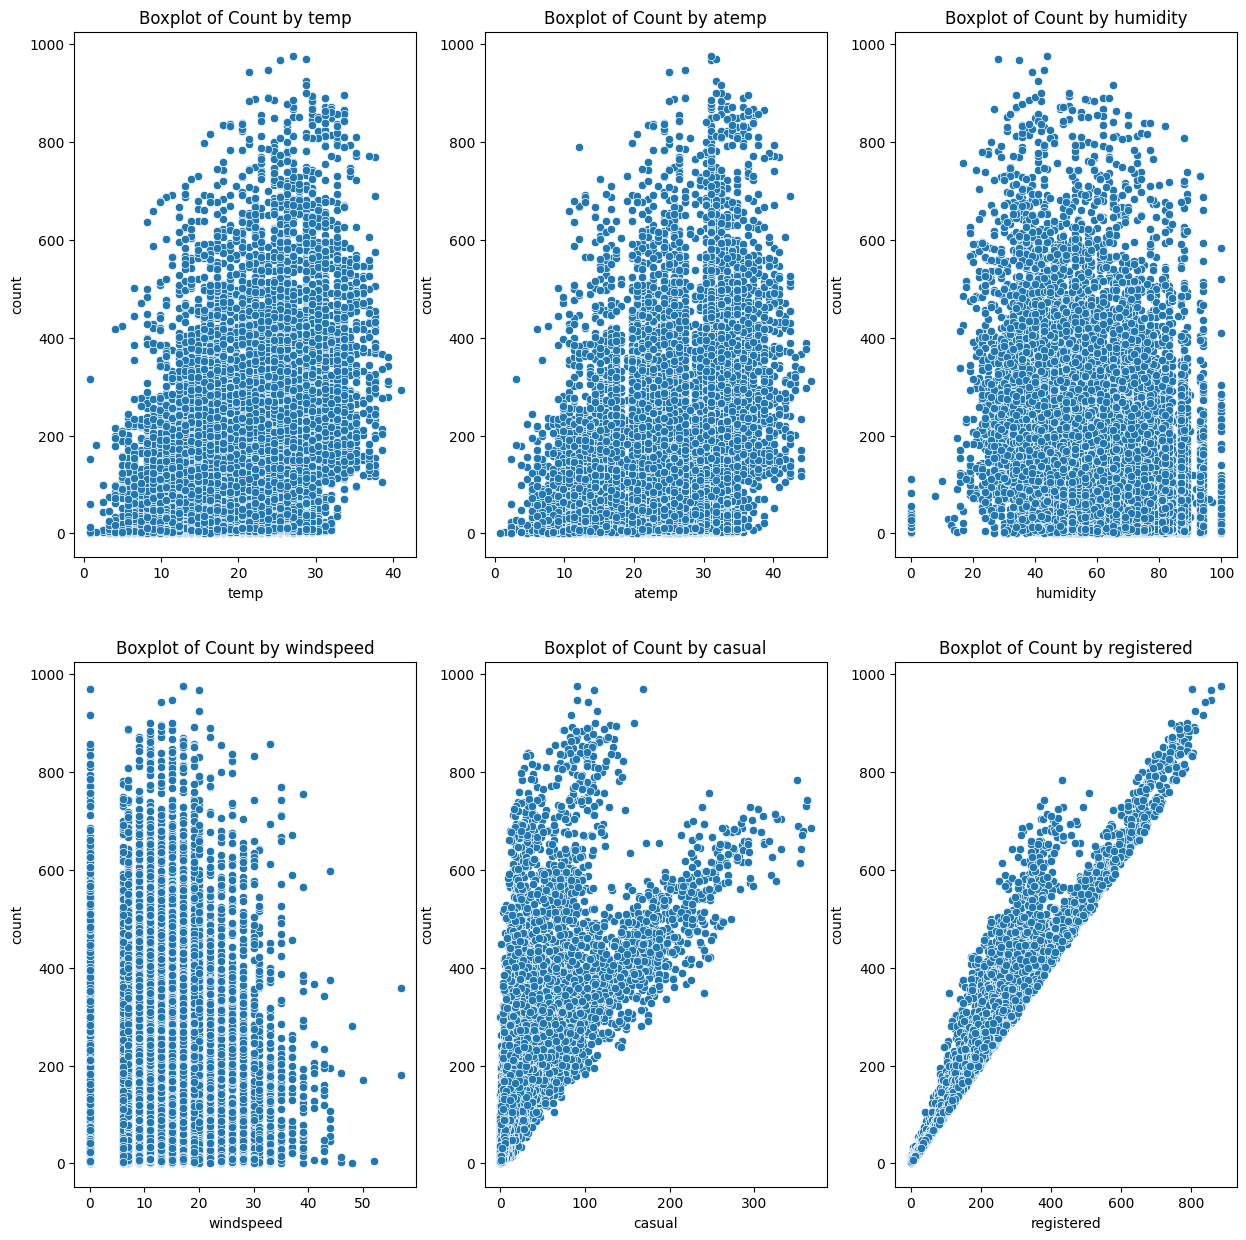

In [10]:
# Relation between Continuous variables and count

i = 1
plt.figure(figsize=(15, 15))
for var in continuous_vars[:-1]:
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='count', data=df)
    i += 1
    plt.title(f'Boxplot of Count by {var}')
plt.show()

## **Only 'Casual' and 'Registered' columns are somewhat poisitvely correlated with 'count' data.**

## Correlation Analysis

<Axes: >

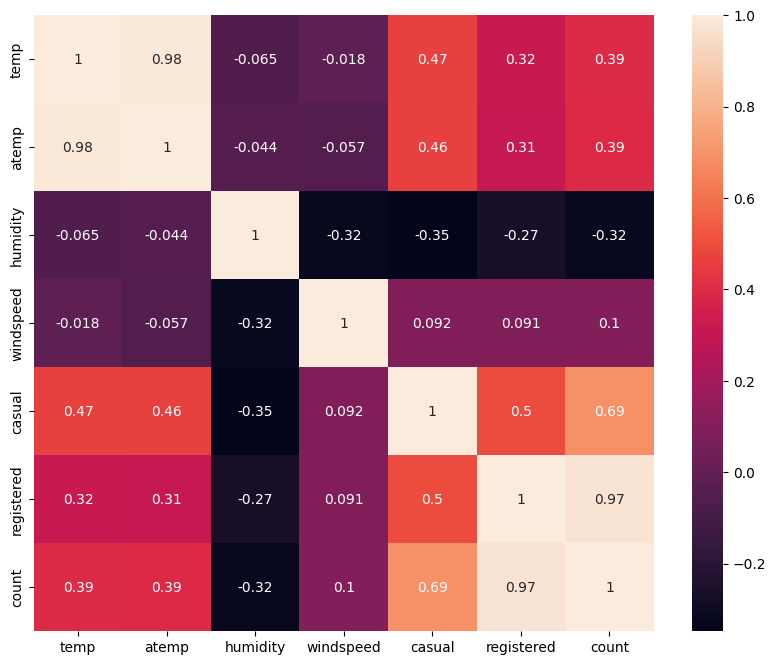

In [11]:
correlation_matrix = df[continuous_vars].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)

## Assumptions

In [12]:
def alpha_test(p_value, alpha=0.05):
    if p_value < alpha:
        return "Ha"
    else:
        return "H0"

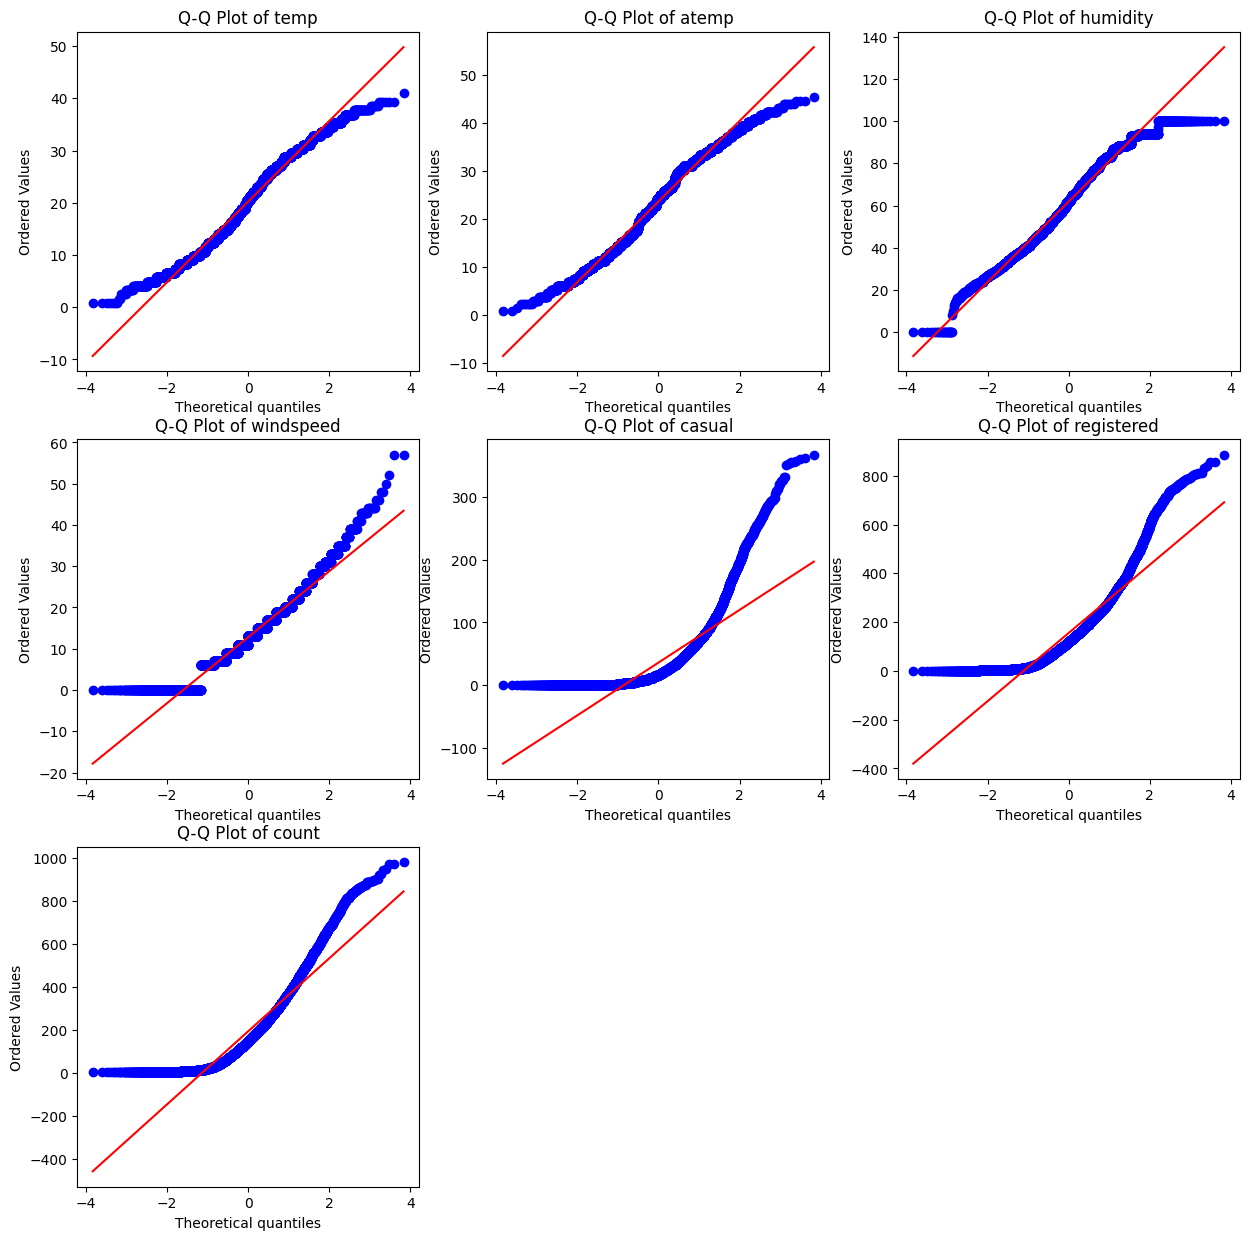

In [13]:
# Q-Q Plot for 'count'
plt.figure(figsize=(15, 15))
i = 1
for var in continuous_vars:
    plt.subplot(3, 3, i)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    i = i+1
plt.show()


## **From the Q-Q plot we can say that columns 'temp', 'atemp' and 'humidity' are close to normal while 'windspeed', 'causal' and 'registered' aren't.**

In [14]:
# Separate data into working day and non-working day
working_day_data = df[df['workingday'] == 1]['count']
non_working_day_data = df[df['workingday'] == 0]['count']

# Levene's test for equal variance between working day and non working day data
levene_test = stats.levene(working_day_data, non_working_day_data)
print(f'Levene Test: {levene_test}')

# Levene's test for equal variance among season groups
season_groups = [df[df['season'] == i]['count'] for i in range(1, 5)]
levene_stat_season, levene_p_season = stats.levene(*season_groups)

print(f"Levene's Test for Seasons - Statistics: {levene_stat_season}, P-value: {levene_p_season}")

# Levene's test for equal variance among weather groups
weather_groups = [df[df['weather'] == i]['count'] for i in range(1, 5)]
levene_stat_weather, levene_p_weather = stats.levene(*weather_groups)

print(f"Levene's Test for Weather - Statistics: {levene_stat_weather}, P-value: {levene_p_weather}")

if alpha_test(levene_test[1]) == "Ha":
    print("We can conclude variance between Working day and non-working day data are not equal")
else:
    print("We can conclude variance between Working day and non-working day data are equal")

if alpha_test(levene_p_season) == "Ha":
    print("We can conclude variance of Season groups are not equal")
else:
    print("We can conclude variance of Season groups are equal")
if alpha_test(levene_p_weather) == "Ha":
    print("We can conclude variance of Weather groups are not equal")
else:
    print("We can conclude variance of Weather groups are equal")

Levene Test: LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)
Levene's Test for Seasons - Statistics: 187.7706624026276, P-value: 1.0147116860043298e-118
Levene's Test for Weather - Statistics: 54.85106195954556, P-value: 3.504937946833238e-35
We can conclude variance between Working day and non-working day data are equal
We can conclude variance of Season groups are not equal
We can conclude variance of Weather groups are not equal


* **We can conclude variance between Working day and non-working day data are equal**
* **We can conclude variance of Season groups are not equal**
* **We can conclude variance of Weather groups are not equal**

## Hypothesis Testing

1. Working Day Effect on Demand (2-Sample T-Test)

In [15]:
from scipy.stats import ttest_ind

# Null Hypothesis (H0): No difference in number of cycles rented on working day vs non-working day
# Alternate Hypothesis (H1): Difference in number of cycles rented on working day vs non-working day

# Separate data into working day and non-working day
working_day_data = df[df['workingday'] == 1]['count']
non_working_day_data = df[df['workingday'] == 0]['count']

# Perform the t-test
t_stat, p_value = ttest_ind(working_day_data, non_working_day_data)

print(f'T-Test Statistics: {t_stat}, P-value: {p_value}')
if alpha_test(levene_p_weather) == "Ha":
    print("We can conclude that working day has an effect on the number of cycles rented.")
else:
    print("We can conclude that working day has no effect on the number of cycles rented.")

T-Test Statistics: 1.2096277376026694, P-value: 0.22644804226361348
We can conclude that working day has an effect on the number of cycles rented.


## **We can conclude that working day has an effect on the number of cycles rented.**

2. Cycle Demand Across Seasons and Weather (ANOVA)

In [16]:
from scipy.stats import f_oneway

# ANOVA for seasons
season_groups = [df[df['season'] == i]['count'] for i in range(1, 5)]
f_stat_season, p_value_season = f_oneway(*season_groups)

print(f'ANOVA for Seasons - F-statistics: {f_stat_season}, P-value: {p_value_season}')

# ANOVA for weather
weather_groups = [df[df['weather'] == i]['count'] for i in range(1, 5)]
f_stat_weather, p_value_weather = f_oneway(*weather_groups)

print(f'ANOVA for Weather - F-statistics: {f_stat_weather}, P-value: {p_value_weather}')

if alpha_test(p_value_season) == "Ha":
    print("We can conclude that the number of cycles rented differs across seasons.")
else:
    print("We can conclude that the number of cycles rented doesn't differs across seasons.")

if alpha_test(p_value_weather) == "Ha":
    print("We can conclude that the number of cycles rented differs across weather conditions.")
else:
    print("We can conclude that the number of cycles rented doesn't differs across weather conditions.")


ANOVA for Seasons - F-statistics: 236.94671081032106, P-value: 6.164843386499654e-149
ANOVA for Weather - F-statistics: 65.53024112793271, P-value: 5.482069475935669e-42
We can conclude that the number of cycles rented differs across seasons.
We can conclude that the number of cycles rented differs across weather conditions.


## **We can conclude that the number of cycles rented differs across seasons.**
## **We can conclude that the number of cycles rented differs across weather conditions.**

3. Dependency Between Weather and Season (Chi-Square Test)

In [17]:
from scipy.stats import chi2_contingency

# Contingency table for weather and season
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistics: {chi2}, P-value: {p}')

if alpha_test(p) == "Ha":
    print("We can conclude that weather is dependent on the season.")
else:
    print("We can conclude that weather is independent on the season.")


Chi-Square Statistics: 49.15865559689363, P-value: 1.5499250736864862e-07
We can conclude that weather is dependent on the season.


## **We can conclude that weather is dependent on the season.**

## Actionable Insights

1. Optimize Operations Based on Day of the Week
**Insight:** Working days have a significant effect on the number of cycles rented.
**Action:** Increase the availability of cycles on working days to meet higher demand. Adjust maintenance schedules to weekends or non-working days when demand is lower.

2. Seasonal Demand Planning
**Insight:** The number of cycles rented differs significantly across seasons, and the variance among season groups is not equal.
**Action:** Plan for seasonal fluctuations by increasing the fleet size during high-demand seasons (e.g., spring and fall) and reducing it during low-demand seasons (e.g., summer and winter). Offer seasonal promotions or discounts to encourage usage during off-peak seasons.

3. Weather-Based Adjustments
**Insight:** The number of cycles rented varies significantly with different weather conditions, and the variance among weather groups is not equal.
**Action:** Implement dynamic pricing based on weather forecasts, offering discounts during unfavorable weather conditions (e.g., heavy rain) to encourage usage. Ensure that the fleet is well-maintained and equipped to handle adverse weather conditions.

4. Targeted Marketing Strategies
**Insight:** 'Casual' and 'Registered' users are positively correlated with the total count, indicating different user behaviors.
**Action:** Develop targeted marketing campaigns for both casual and registered users. For casual users, promote short-term offers and easy sign-up processes. For registered users, offer loyalty programs and subscription plans to encourage frequent usage.

5. Addressing Outliers and Improving User Experience
**Insight:** There are outliers in the count data across different categories, suggesting occasional spikes in demand.
**Action:** Investigate the reasons for these outliers (e.g., events, holidays) and prepare to scale operations accordingly during such times. Improve the user experience by ensuring availability during peak times and maintaining high service standards.

6. Improving Data Quality and Monitoring
**Insight:** Some columns such as 'casual', 'windspeed', and 'registered' are right-skewed, indicating variability in the data.
**Action:** Continuously monitor and analyze rental data to identify trends and patterns. Use this data to improve forecasting models and operational planning. Invest in better data collection and processing tools to enhance accuracy and reliability.

7. Weather-Season Dependencies
**Insight:** Weather is dependent on the season, affecting rental patterns.
**Action:** Use historical weather and season data to predict demand more accurately. Implement proactive measures such as sending weather-based notifications to users about availability and safety tips.

8. Infrastructure and Resource Allocation
**Insight:** The analysis shows a varying demand based on different factors like weather, season, and working day.
**Action:** Allocate resources (e.g., charging stations, maintenance staff) strategically based on the predicted demand patterns. Ensure that infrastructure can handle peak demand times to avoid service disruptions.